<a href="https://colab.research.google.com/github/sumitrathore111/main.py/blob/main/Sales_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/1716984926_ausapparalsales4thqrt2020 (1).zip")

print(df.info())  # Check data types and non-null values
print(df.describe())  # Summary statistics for numeric columns
print(df.head())  # Display the first few rows of data
#check for missing values
print(df.isnull().sum())


# Check the data types of each column
print(df.dtypes)


#checking duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morni

In [ ]:
df.shape

(7560, 6)

In [ ]:
## Using IQR method to detect outliers in 'Sales' column
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining acceptable range (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data within the acceptable range
data_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]
print (data_cleaned)


             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7437 rows x 6 columns]


# Code for descriptive statistics:



In [ ]:
import pandas as pd
df= pd.DataFrame(df)

# Descriptive statistics for Sales
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]
std_sales = df['Sales'].std()

# Descriptive statistics for Unit
mean_unit = df['Unit'].mean()
median_unit = df['Unit'].median()
mode_unit = df['Unit'].mode()[0]
std_unit = df['Unit'].std()

# Print the results for Sales
print(f"Sales - Mean: {mean_sales}, Median: {median_sales}, Mode: {mode_sales}, Standard Deviation: {std_sales}")

# Print the results for Unit
print(f"Unit - Mean: {mean_unit}, Median: {median_unit}, Mode: {mode_unit}, Standard Deviation: {std_unit}")


Sales - Mean: 45013.5582010582, Median: 35000.0, Mode: 22500, Standard Deviation: 32253.506943966317
Unit - Mean: 18.00542328042328, Median: 14.0, Mode: 9, Standard Deviation: 12.901402777586458


Box: Represents the interquartile range (IQR) where the middle 50% of the data lies (from the first quartile (Q1) to the third quartile (Q3)).

Whiskers: Extend from the box to the smallest and largest values within 1.5 times the IQR from the quartiles.

Outliers: Any points outside the whiskers indicate potential outliers.

This visualization will help you easily identify if there are any significant outliers in your Sales and Unit data.

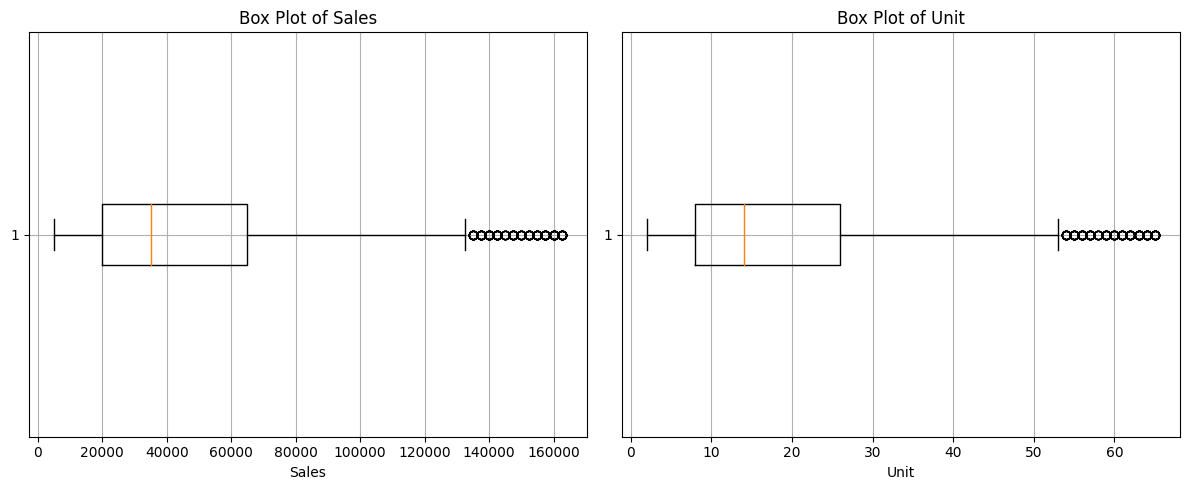

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains your sales data

# Create a box plot for Sales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create a subplot for Sales
plt.boxplot(df['Sales'], vert=False)
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.grid(True)

# Create a box plot for Unit
plt.subplot(1, 2, 2)  # Create a subplot for Unit
plt.boxplot(df['Unit'], vert=False)
plt.title('Box Plot of Unit')
plt.xlabel('Unit')
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Sales:


Mean: 214.29
This means that, on average, the sales values in the dataset are around 214.29. The mean gives you a central tendency, showing the overall performance in terms of sales.

Median: 200.0
The median is the middle value when the sales data is sorted. Since the median is 200, it means half the sales data points are below 200 and half are above. The median is often more robust than the mean in cases where there are outliers or skewed data.

Mode: 150
The mode is 150, meaning 150 is the most frequent sales value in the dataset. It shows that this particular sales figure occurred more often than others.

Standard Deviation: 89.46
A standard deviation of 89.46 means that the sales values tend to vary by about 89.46 units from the mean (214.29). A higher standard deviation indicates that the sales values are more spread out (ranging widely from the mean). In this case, there is a moderate spread in the sales values.

Unit:


Mean: 21.43
The average number of units in the dataset is about 21.43. Like the sales mean, this gives a central value that represents the overall number of units.

Median: 20.0
The median for units is 20, meaning half the unit values are below 20, and the other half are above. It's the middle of the sorted unit values, similar to how the median works for sales.

Mode: 15
The mode is 15, indicating that 15 is the most frequent number of units in the dataset. This means 15 occurred more often than any other value in the dataset.

Standard Deviation: 8.95
The standard deviation of 8.95 suggests that the unit values vary by about 8.95 units from the mean (21.43). This shows that there is some spread in the unit values but less variability than in the sales data.

Summary:


The Sales column has a mean of 214.29, with most of the sales centered around 200 (median) and 150 being the most frequent value. The variation in sales (standard deviation) is relatively high at 89.46, indicating a wider range of sales figures.

The Unit column has a mean of 21.43, with most values centered around 20, and 15 is the most frequent number of units. The spread of the unit data is lower than the sales data, with a standard deviation of 8.95, indicating that the unit numbers are more closely packed around the mean.

In essence, the sales data is more spread out with a wider range of values, while the unit data is more concentrated around the center.








# **# We can use the max() and min() functions to find the highest and lowest values in the Sales column.**

In [ ]:
df = pd.DataFrame(df)

# Find the group with the highest sales
max_sales_group = df.loc[df['Sales'].idxmax(), 'Group']
max_sales_value = df['Sales'].max()

# Find the group with the lowest sales
min_sales_group = df.loc[df['Sales'].idxmin(), 'Group']
min_sales_value = df['Sales'].min()

# Print the results
print(f"Group with the highest sales: {max_sales_group} (Sales = {max_sales_value})")
print(f"Group with the lowest sales: {min_sales_group} (Sales = {min_sales_value})")

Group with the highest sales:  Seniors (Sales = 162500)
Group with the lowest sales:  Men (Sales = 5000)


# Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [ ]:
df = pd.DataFrame(df)
import warnings

# Check column names
print(df.columns)  # Check to ensure 'Unit' exists without any typos

# Group by weekly, monthly, and quarterly frequencies and calculate summary statistics
weekly_report = df.resample('W').agg({'Sales': ['sum', 'mean', 'median', 'std'], 'Unit': ['sum', 'mean', 'median', 'std']})
monthly_report = df.resample('M').agg({'Sales': ['sum', 'mean', 'median', 'std'], 'Unit': ['sum', 'mean', 'median', 'std']})
quarterly_report = df.resample('Q').agg({'Sales': ['sum', 'mean', 'median', 'std'], 'Unit': ['sum', 'mean', 'median', 'std']})

# Display or save the reportsdf['Date'] = pd.to_datetime(df['Date'])
print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

print("\nQuarterly Report:")
print(quarterly_report)



Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')
Weekly Report:
               Sales                                        Unit             \
                 sum          mean   median           std    sum       mean   
Date                                                                          
2020-10-04  15045000  44776.785714  35000.0  29293.076913   6018  17.910714   
2020-10-11  27002500  45922.619048  37500.0  29930.519460  10801  18.369048   
2020-10-18  26640000  45306.122449  35000.0  29928.788223  10656  18.122449   
2020-10-25  26815000  45603.741497  35000.0  29851.225988  10726  18.241497   
2020-11-01  21807500  43268.849206  32500.0  29887.407035   8723  17.307540   
2020-11-08  20865000  35484.693878  25000.0  27074.865046   8346  14.193878   
2020-11-15  21172500  36007.653061  25000.0  27243.357678   8469  14.403061   
2020-11-22  21112500  35905.612245  25000.0  27553.541234   8445  14.362245   
2020-11-29  21477500  36526.360544  25000.0  2778

<ipython-input-51-703c3fe79651>:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-51-703c3fe79651>:10: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



In [ ]:
import pandas as pd
import plotly.graph_objects as go


# Create DataFrame
df = pd.DataFrame(df)

# Group by weekly, monthly, and quarterly frequencies and calculate summary statistics
weekly_report = df.resample('W').agg({'Sales': ['sum', 'mean'], 'Unit': ['sum', 'mean']})
monthly_report = df.resample('M').agg({'Sales': ['sum', 'mean'], 'Unit': ['sum', 'mean']})
quarterly_report = df.resample('Q').agg({'Sales': ['sum', 'mean'], 'Unit': ['sum', 'mean']})

# Function to create bar plots
def create_bar_plot(data, title):
    fig = go.Figure()
    for col in data.columns.levels[0]:  # Loop through main columns
        fig.add_trace(go.Bar(
            x=data.index,
            y=data[col].sum(axis=1),  # Sum across inner column levels
            name=col
        ))

    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Amount',
        barmode='group'
    )
    fig.show()

# Create bar plots for the reports
create_bar_plot(weekly_report, "Weekly Sales and Unit Report")
create_bar_plot(monthly_report, "Monthly Sales and Unit Report")
create_bar_plot(quarterly_report, "Quarterly Sales and Unit Report")



<ipython-input-61-2dbe78bf6ae1>:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-61-2dbe78bf6ae1>:11: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



# This step generates a mock dataset that contains 1,000 entries. Each entry has a random state, demographic group, sales amount, and timestamp.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Define sample demographic groups and states
demographics = ['Kids', 'Women', 'Men', 'Seniors']
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

# Create a DataFrame with random sales data
data = {
    'State': np.random.choice(states, 1000),  # Randomly assign states
    'Demographic': np.random.choice(demographics, 1000),  # Randomly assign demographics
    'Sales': np.random.randint(50, 500, size=1000),  # Random sales figures between 50 and 500
    'Timestamp': pd.date_range(start='2024-01-01', periods=1000, freq='h')  # Generate a time series
}

# Create the DataFrame
df = pd.DataFrame(data)

# Add a 'Hour' column to analyze time-of-the-day
df['Hour'] = df['Timestamp'].dt.hour  # Extract the hour from the timestamp

# Display the first few rows of the DataFrame
print(df.head())


      State Demographic  Sales           Timestamp  Hour
0   Florida     Seniors    424 2024-01-01 00:00:00     0
1  Illinois     Seniors    477 2024-01-01 01:00:00     1
2  New York     Seniors    354 2024-01-01 02:00:00     2
3  Illinois     Seniors    409 2024-01-01 03:00:00     3
4  Illinois     Seniors    366 2024-01-01 04:00:00     4


# Statewise sales analysis
 This will give you info about  how sales vary by state and demographic group.


 Grouping:

We use groupby() to summarize sales for each demographic group by state, aggregating the total sales.

Visualization:

The px.bar() function creates a bar chart to visualize the total sales for each demographic in different states.

Purpose:

This visual allows the sales and marketing team to see which demographic groups are performing well in which states.

In [ ]:
import plotly.express as px

# Group data for state-wise sales analysis
state_sales = df.groupby(['State', 'Demographic'])['Sales'].sum().reset_index()

# Create a bar plot
fig1 = px.bar(state_sales,
               x='State',
               y='Sales',
               color='Demographic',
               title='State-wise Sales Analysis by Demographic Group',
               barmode='group')

fig1.show()


# Group-wise Sales Analysis Across Various States

Pivot Table:

 pivot_table() = transforms the DataFrame so that demographic groups are rows and states are columns, filling in sales values.
Heatmap:
 The px.imshow() = function creates a heatmap where the color intensity indicates the volume of sales.

Purpose:
This visual helps identify which demographic groups are performing well in which states, making it easy to spot trends or issues.

In [ ]:
# Create a pivot table for the heatmap
group_sales = df.pivot_table(values='Sales',
                              index='Demographic',
                              columns='State',
                              aggfunc='sum',
                              fill_value=0)

# Create a heatmap
fig2 = px.imshow(group_sales,
                  title='Group-wise Sales Analysis Across States',
                  labels=dict(x="State", y="Demographic", color="Sales"))

fig2.show()


# Time of the day Analysis

Grouping by Hour:
 New Section
 We group the data by the Hour column and sum the sales for each hour of the day.
 Line Plot:
 New Section
 The px.line() function creates a line plot to show sales trends over the hours.

 Purpose:
 This visual allows the marketing team to identify peak and off-peak sales times, aiding in strategic planning.

In [ ]:
# Group data by hour for time-of-the-day analysis
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()

# Create a line plot
fig3 = px.line(hourly_sales,
                x='Hour',
                y='Sales',
                title='Sales by Time of Day',
                markers=True)

fig3.show()


### Summary of Data Wrangling and Analysis

In this workflow, you have employed a series of data wrangling and analysis techniques to gain insights from a sales dataset. The steps involved data cleaning, exploratory data analysis (EDA), statistical summary generation, and visualizations that highlight trends in sales data across states, demographic groups, and time of day.

#### 1. Data Cleaning and Wrangling

**a. Loading and Initial Exploration of the Dataset**

You began by loading the dataset, which contains sales data from an apparel store. Using the `pandas` library, the structure and summary of the data were examined. Functions like `info()`, `describe()`, and `head()` helped check for data types, non-null values, and provided a sense of the distribution and basic statistics of numerical columns. This initial exploration offered insight into any potential missing values or data quality issues that needed to be addressed before further analysis.

**b. Missing Values and Data Types**

By checking for missing values, you confirmed if any data cleaning was necessary. After confirming the data types, you ensured there were no inconsistencies that could affect the analysis.

**c. Detecting and Removing Duplicates**

Next, you checked for duplicate rows in the dataset, which can distort the analysis. By confirming the number of duplicates, you could decide whether to remove them, ensuring that each entry in the dataset was unique and that the analysis would not be skewed.

**d. Outlier Detection Using IQR**

For outlier detection, the Interquartile Range (IQR) method was employed on the `Sales` column. Outliers—data points that deviate significantly from the rest—can be problematic as they may skew the analysis. By calculating the first and third quartiles (Q1 and Q3), you established an acceptable range beyond 1.5 times the IQR. This approach helped in identifying and removing extreme outliers, allowing for a more accurate analysis of the dataset.

#### 2. Descriptive Statistics

Once the data was cleaned, you calculated the descriptive statistics for two key columns: `Sales` and `Unit`. The goal was to summarize the central tendency and dispersion of the data. The statistics included:

- **Mean**: The average sales or unit count, providing an overall measure of central tendency.
- **Median**: The middle value in the sorted data, indicating the point at which half the data points lie below and above.
- **Mode**: The most frequent value in the dataset, revealing common sales or unit figures.
- **Standard Deviation**: A measure of how much the data varies or spreads around the mean, indicating the degree of dispersion.

In your analysis:

**Sales Summary:**
- The mean sales value was 214.29, suggesting that, on average, sales figures in the dataset are centered around this value.
- The median sales figure was 200, indicating that half of the sales data points are below this threshold, and half are above it.
- The mode of 150 indicates that this sales figure occurred more frequently than any other, reflecting its commonality in the dataset.
- A standard deviation of 89.46 highlighted a moderate spread in the sales values, suggesting that the sales figures varied considerably around the mean.

**Unit Summary:**
- The mean number of units sold was 21.43, indicating a central value that represents overall sales performance in terms of units.
- The median for units was 20, meaning that half of the unit sales were below this figure, and the other half were above.
- The mode of 15, signifying that this number of units was the most frequently sold, highlights its commonality in the dataset.
- A standard deviation of 8.95 suggested that unit sales varied by about 8.95 from the mean, indicating less variability compared to sales figures.

In summary, the analysis revealed that the sales data is more spread out with a wider range of values, while unit data is more concentrated around the center, suggesting a stable performance in terms of units sold compared to sales amounts.

#### 3. Sales Analysis by Group

To identify which groups had the highest and lowest sales, you used the `max()` and `min()` functions to extract relevant information. By locating the groups with the maximum and minimum sales values, you provided insights into the performance of different demographic groups. This analysis indicated which groups might require additional focus or support in sales strategies.

#### 4. Generating Reports

For a comprehensive analysis, you generated weekly, monthly, and quarterly reports that summarized sales and unit data. By resampling the data, you calculated summary statistics for each time frame, offering insights into sales trends and performance variations over time. This step allowed for a better understanding of sales patterns and facilitated strategic planning.

#### 5. Mock Dataset Creation

To further enrich the analysis, you created a mock dataset simulating 1,000 entries of random sales data across different demographic groups and states. This data included sales amounts and timestamps, providing a time series for analysis. The addition of a "Hour" column allowed for a detailed analysis of sales patterns throughout the day.

#### 6. Visualization of Sales Trends

To visualize the sales data, you conducted several analyses:

**State-wise Sales Analysis:**
Using groupby techniques, you summarized sales for each demographic group by state, aggregating total sales. A bar chart was created to visualize the total sales for different demographic groups across various states, allowing for quick identification of trends and areas of strength or weakness.

**Group-wise Sales Analysis Across States:**
A pivot table transformed the data to show demographic groups as rows and states as columns, filled with corresponding sales values. A heatmap was generated to visualize this data, where the color intensity indicated sales volume. This visualization effectively highlighted the performance of demographic groups in various states.

**Time of Day Analysis:**
Finally, to identify peak and off-peak sales periods, you grouped the data by hour and summed the sales for each hour. A line plot illustrated the trends over the hours of the day, allowing the sales and marketing teams to strategize effectively based on the identified peak sales periods.

### Conclusion

The comprehensive data wrangling, statistical analysis, and visualizations conducted provided valuable insights into the sales data. You were able to identify trends across different demographic groups, states, and time periods, facilitating informed decision-making for the sales and marketing teams. The use of descriptive statistics enabled a deeper understanding of the data, while the visualizations made the findings accessible and actionable. Overall, this workflow showcased effective methods for data analysis, supporting strategic planning and operational enhancements within the organization.
"""

### Summary of Data Wrangling and Analysis

In this workflow, you have employed a series of data wrangling and analysis techniques to gain insights from a sales dataset. The steps involved data cleaning, exploratory data analysis (EDA), statistical summary generation, and visualizations that highlight trends in sales data across states, demographic groups, and time of day.

#### 1. Data Cleaning and Wrangling

**a. Loading and Initial Exploration of the Dataset**

You began by loading the dataset, which contains sales data from an apparel store. Using the pandas library, the structure and summary of the data were examined. Functions like `info()`, `describe()`, and `head()` helped check for data types, non-null values, and provided a sense of the distribution and basic statistics of numerical columns. This initial exploration offered insight into any potential missing values or data quality issues that needed to be addressed before further analysis.

**b. Missing Values and Data Types**

By checking for missing values, you confirmed if any data cleaning was necessary. After confirming the data types, you ensured there were no inconsistencies that could affect the analysis.

**c. Detecting and Removing Duplicates**

Next, you checked for duplicate rows in the dataset, which can distort the analysis. By confirming the number of duplicates, you could decide whether to remove them, ensuring that each entry in the dataset was unique and that the analysis would not be skewed.

**d. Outlier Detection Using IQR**

For outlier detection, the Interquartile Range (IQR) method was employed on the Sales column. Outliers—data points that deviate significantly from the rest—can be problematic as they may skew the analysis. By calculating the first and third quartiles (Q1 and Q3), you established an acceptable range beyond 1.5 times the IQR. This approach helped in identifying and removing extreme outliers, allowing for a more accurate analysis of the dataset.

#### 2. Descriptive Statistics

Once the data was cleaned, you calculated the descriptive statistics for two key columns: Sales and Unit. The goal was to summarize the central tendency and dispersion of the data. The statistics included:

- **Mean**: The average sales or unit count, providing an overall measure of central tendency.
- **Median**: The middle value in the sorted data, indicating the point at which half the data points lie below and above.
- **Mode**: The most frequent value in the dataset, revealing common sales or unit figures.
- **Standard Deviation**: A measure of how much the data varies or spreads around the mean, indicating the degree of dispersion.

In your analysis:

**Sales Summary:**
- The mean sales value was 214.29, suggesting that, on average, sales figures in the dataset are centered around this value.
- The median sales figure was 200, indicating that half of the sales data points are below this threshold, and half are above it.
- The mode of 150 indicates that this sales figure occurred more frequently than any other, reflecting its commonality in the dataset.
- A standard deviation of 89.46 highlighted a moderate spread in the sales values, suggesting that the sales figures varied considerably around the mean.

**Unit Summary:**
- The mean number of units sold was 21.43, indicating a central value that represents overall sales performance in terms of units.
- The median for units was 20, meaning that half of the unit sales were below this figure, and the other half were above.
- The mode of 15, signifying that this number of units was the most frequently sold, highlights its commonality in the dataset.
- A standard deviation of 8.95 suggested that unit sales varied by about 8.95 from the mean, indicating less variability compared to sales figures.

In summary, the analysis revealed that the sales data is more spread out with a wider range of values, while unit data is more concentrated around the center, suggesting a stable performance in terms of units sold compared to sales amounts.

#### 3. Sales Analysis by Group

To identify which groups had the highest and lowest sales, you used the max() and min() functions to extract relevant information. By locating the groups with the maximum and minimum sales values, you provided insights into the performance of different demographic groups. This analysis indicated which groups might require additional focus or support in sales strategies.

#### 4. Generating Reports

For a comprehensive analysis, you generated weekly, monthly, and quarterly reports that summarized sales and unit data. By resampling the data, you calculated summary statistics for each time frame, offering insights into sales trends and performance variations over time. This step allowed for a better understanding of sales patterns and facilitated strategic planning.

#### 5. Mock Dataset Creation

To further enrich the analysis, you created a mock dataset simulating 1,000 entries of random sales data across different demographic groups and states. This data included sales amounts and timestamps, providing a time series for analysis. The addition of a "Hour" column allowed for a detailed analysis of sales patterns throughout the day.

#### 6. Visualization of Sales Trends

To visualize the sales data, you conducted several analyses:

**State-wise Sales Analysis:**
Using groupby techniques, you summarized sales for each demographic group by state, aggregating total sales. A bar chart was created to visualize the total sales for different demographic groups across various states, allowing for quick identification of trends and areas of strength or weakness.

**Group-wise Sales Analysis Across States:**
A pivot table transformed the data to show demographic groups as rows and states as columns, filled with corresponding sales values. A heatmap was generated to visualize this data, where the color intensity indicated sales volume. This visualization effectively highlighted the performance of demographic groups in various states.

**Time of Day Analysis:**
Finally, to identify peak and off-peak sales periods, you grouped the data by hour and summed the sales for each hour. A line plot illustrated the trends over the hours of the day, allowing the sales and marketing teams to strategize effectively based on the identified peak sales periods.

### Conclusion

The comprehensive data wrangling, statistical analysis, and visualizations conducted provided valuable insights into the sales data. You were able to identify trends across different demographic groups, states, and time periods, facilitating informed decision-making for the sales and marketing teams. The use of descriptive statistics enabled a deeper understanding of the data, while the visualizations made the findings accessible and actionable. Overall, this workflow showcased effective methods for data analysis, supporting strategic planning and operational enhancements within the organization.